In [41]:
import matplotlib.pyplot as plt
from datetime import datetime

In [42]:
sizes = [1.0877304077148438, 2.2053451538085938, 4.471122741699219, 8.057334899902344, 16.334800720214844, 33.115562438964844, 67.13497161865234, 136.10210418701172, 275.9182662963867, 559.3656845092773, 1133.994773864746, 2298.9325790405273, 4142.751365661621, 8398.544395446777]

In [43]:
def map_to_datetime(l):
    return list(map(lambda x: datetime.strptime(x, '%H:%M:%S.%f'), l))

In [44]:
checkpoint_create_times = map_to_datetime(['0:00:05.196501', '0:00:05.157187', '0:00:05.337205', '0:00:05.493348', '0:00:05.725931', '0:00:07.486628', '0:00:07.944575', '0:00:10.078792', '0:00:16.227121', '0:00:30.974177', '0:00:48.705301', '0:01:14.117771', '0:02:16.802119', '0:04:33.023861'])
checkpoint_restore_times = map_to_datetime(['0:00:04.654588', '0:00:07.044184', '0:00:04.881104', '0:00:05.718608', '0:00:07.533651', '0:00:08.620062', '0:00:13.046991', '0:00:13.199004', '0:00:19.789569', '0:00:23.262073', '0:00:30.922143', '0:00:59.311292', '0:01:39.911333', '0:03:02.306132'])
checkpoint_size = [136407141, 135604737, 137906831, 141883658, 149846304, 167418211, 199944909, 270359242, 404126592, 672182816, 1206835939, 2280979318, 4427660533, 8727558440]
pickle_create_time = map_to_datetime(['0:00:00.002698', '0:00:00.005624', '0:00:00.011380', '0:00:00.019846', '0:00:00.038757', '0:00:00.080801', '0:00:00.161098', '0:00:00.456296', '0:00:00.713169', '0:00:01.891802', '0:00:03.193367', '0:00:05.590478', '0:00:15.298093', '0:00:20.539520'])
pickle_restore_time = map_to_datetime(['0:00:00.003501', '0:00:00.007567', '0:00:00.014288', '0:00:00.029108', '0:00:00.055932', '0:00:00.117223', '0:00:00.220650', '0:00:00.437781', '0:00:00.880210', '0:00:01.804264', '0:00:03.588694', '0:00:13.473603', '0:00:39.708391', '0:00:28.738166'])
pickle_size = [262458, 524900, 1049784, 2099552, 4199090, 8398164, 16796312, 33592610, 67185213, 134370410, 268740806, 537481598, 1074963180, 2149926346]

In [45]:
checkpoint_size = list(map(lambda x : x / (1024 * 1024), checkpoint_size))
pickle_size = list(map(lambda x : x / (1024 * 1024), pickle_size))

In [46]:
def sizeof_fmt(x, pos):
    if x<0:
        return ""
    for x_unit in ['MB', 'GB']:
        if x < 1024.0:
            return "%3.1f %s" % (x, x_unit)
        x /= 1024.0

In [47]:
import matplotlib.dates as mdates

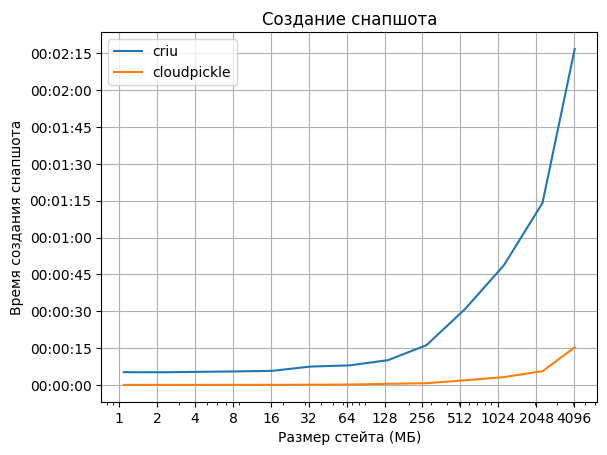

In [48]:
ax = plt.subplot()
ax.set_title("Создание снапшота")
ax.plot(sizes[:-1], checkpoint_create_times[:-1], label="criu")
ax.plot(sizes[:-1], pickle_create_time[:-1], label = "cloudpickle")
plt.legend(loc="upper left")
ax.set_xscale('log')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Время создания снапшота')
plt.grid()
plt.savefig('create.png')
plt.show()

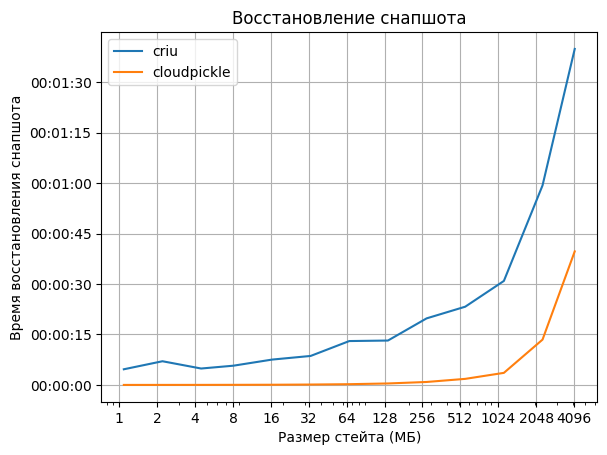

In [49]:
ax = plt.subplot()
ax.set_title("Восстановление снапшота")
ax.plot(sizes[:-1], checkpoint_restore_times[:-1], label="criu")
ax.plot(sizes[:-1], pickle_restore_time[:-1], label = "cloudpickle")
plt.legend(loc="upper left")
ax.set_xscale('log')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Время восстановления снапшота')
plt.grid()
plt.savefig('load.png')
plt.show()

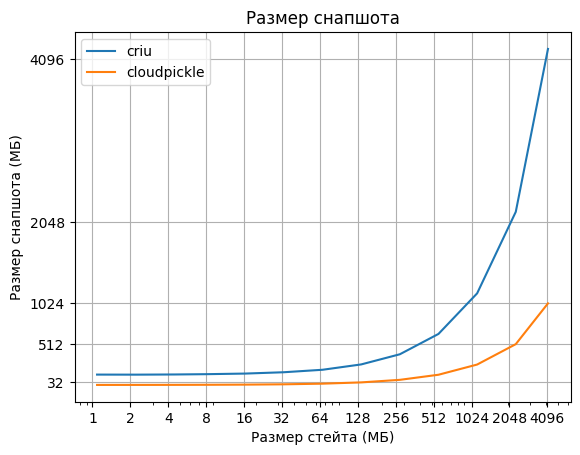

In [50]:
ax = plt.subplot()
ax.set_title("Размер снапшота")
ax.plot(sizes[:-1], checkpoint_size[:-1], label="criu")
ax.plot(sizes[:-1], pickle_size[:-1], label = "cloudpickle")
plt.legend(loc="upper left")
ax.set_xscale('log')

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][:-1])
ax.set_yticks([32, 512, 1024, 2048, 4096])
ax.set_yticklabels([32, 512, 1024, 2048, 4096])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Размер снапшота (МБ)')
plt.grid()
plt.savefig('size.png')
plt.show()

In [27]:
def div(a, b):
    return (a.microsecond + a.second * 10000000 + a.minute * 60 * 10000000) / (b.microsecond + b.second * 10000000 + b.minute * 60 * 10000000)

In [28]:
divs = [div(a, b) for a, b in zip(checkpoint_create_times, pickle_create_time)]
divs

[18605.078206078575,
 8918.41874110953,
 4423.304481546573,
 2544.2581880479693,
 1308.8198518977217,
 872.348461033898,
 440.3814758718296,
 219.32866384978172,
 224.6692172542553,
 27.63309294458346,
 15.920890869839061,
 14.629586441148076,
 13.567577192120691,
 13.613395808467079]

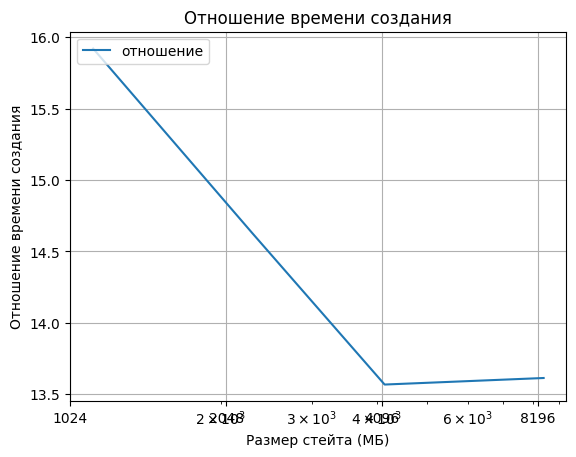

In [31]:
ax = plt.subplot()
ax.set_title("Отношение времени создания")
ax.plot(sizes[10:], divs[10:], label="отношение")
plt.legend(loc="upper left")
ax.set_xscale('log')

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][10:])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][10:])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Отношение времени создания')
plt.grid()
plt.savefig('div_create.png')
plt.show()

In [14]:
divs_load = [div(a, b) for a, b in zip(checkpoint_restore_times, pickle_restore_time)]
divs_load

[11612.278777492145,
 9256.532839962998,
 2861.219484882419,
 1742.4284732719527,
 1261.0607702209827,
 687.7495201453639,
 589.3813324269205,
 297.40670335167584,
 216.75460287885846,
 21.31214796306347,
 9.837691762845449,
 4.524373347764452,
 7.535447963736291]

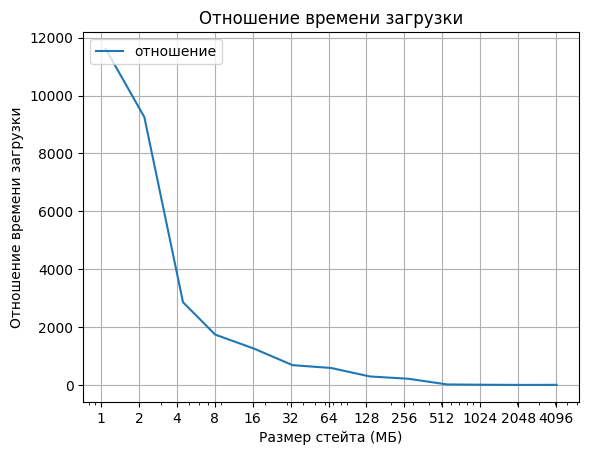

In [15]:
ax = plt.subplot()
ax.set_title("Отношение времени загрузки")
ax.plot(sizes, divs_load, label="отношение")
plt.legend(loc="upper left")
ax.set_xscale('log')

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Отношение времени загрузки')
plt.grid()
plt.savefig('div_load.png')
plt.show()

In [16]:
divs_size = [a / b for a, b in zip(checkpoint_size, pickle_size)]
divs_size

[519.7294081338729,
 258.34394551343115,
 131.36686308802572,
 67.57806332017498,
 35.68542327027999,
 19.93509664731482,
 11.90409591105476,
 8.04817613159561,
 6.015112164636585,
 5.002461598502229,
 4.490705959258007,
 4.243827744964024,
 4.119261013200471]

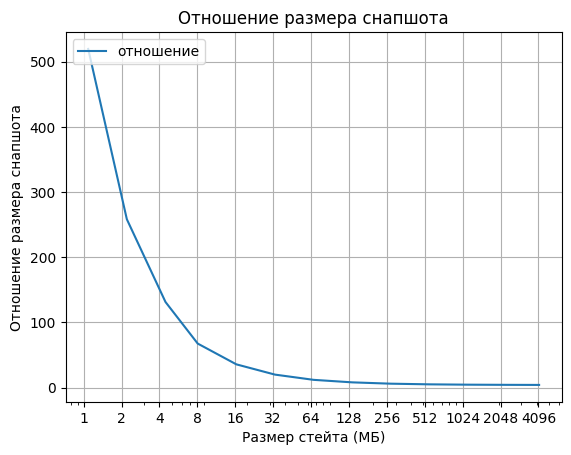

In [17]:
ax = plt.subplot()
ax.set_title("Отношение размера снапшота")
ax.plot(sizes, divs_size, label="отношение")
plt.legend(loc="upper left")
ax.set_xscale('log')

ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.set_xlabel('Размер стейта (МБ)')
ax.set_ylabel('Отношение размера снапшота')
plt.grid()
plt.savefig('div_size.png')
plt.show()

In [32]:
ram_size = [2, 4, 6, 8, 10, 12, 14, 16]
ram_create = map_to_datetime(['0:02:44.338033', '0:01:01.184760', '0:00:50.014300', '0:00:49.122021', '0:00:42.721285', '0:00:41.976131', '0:00:41.403295', '0:00:41.229835'])
ram_start = map_to_datetime(['0:02:24.851082', '0:01:51.888070', '0:00:49.718822', '0:00:46.427562', '0:00:39.633370', '0:00:35.584732', '0:00:35.951634', '0:00:35.646851'])

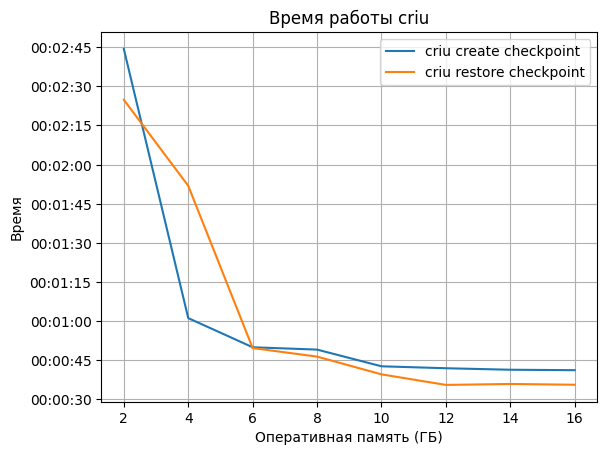

In [51]:
ax = plt.subplot()
ax.set_title("Время работы criu")
ax.plot(ram_size, ram_create, label="criu create checkpoint")
ax.plot(ram_size, ram_start, label = "criu restore checkpoint")
plt.legend(loc="upper right")
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

# ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][8:])
# ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8196][8:])
ax.set_xlabel('Оперативная память (ГБ)')
ax.set_ylabel('Время')
plt.grid()
plt.savefig('ram_time.png')
plt.show()